<a href="https://colab.research.google.com/github/shristi-muskan510/Gold-price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading the csv data
gold_data = pd.read_csv('gld_price_data.csv')

gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#getting statics of data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation

<Axes: >

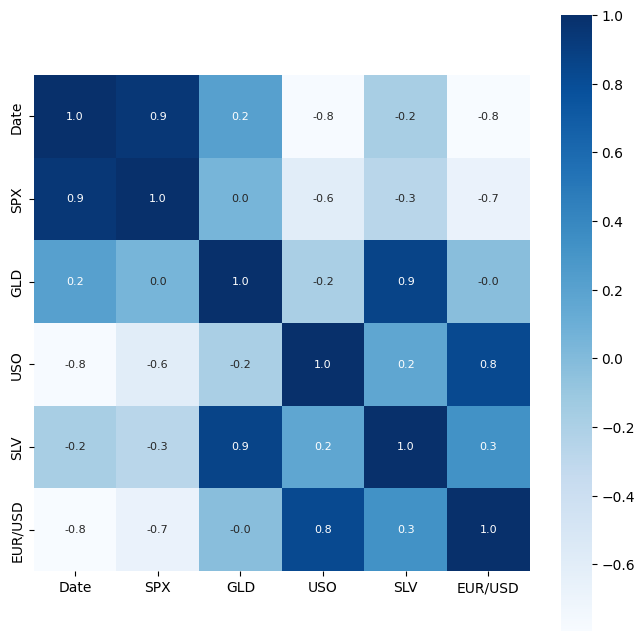

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
Correlation = gold_data.corr()

#constructing a heat map
plt.figure(figsize=(8,8))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#Correlation values of GLD
print(Correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-f0d0cc8dc31e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

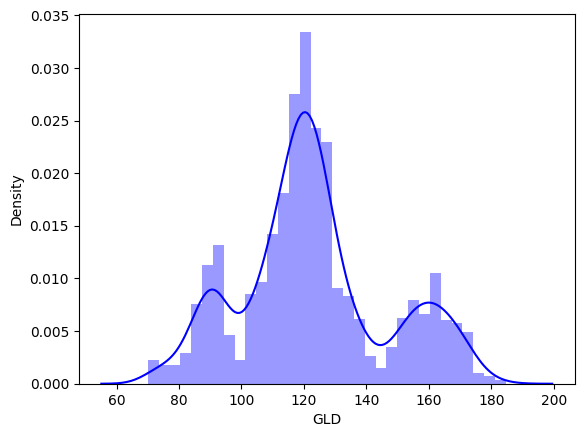

In [ ]:
#checking the distribution of GLD Prices
sns.distplot(gold_data['GLD'], color='Blue')

Splitting the Feautres and target

In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)


In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
pred = regressor.predict(X_test)
print(pred)

[168.59899933  81.73840004 115.92859971 127.75540072 120.74230158
 154.61729779 150.59339834 126.06200011 117.35269876 125.95990112
 116.36950112 171.59900149 142.20329899 167.91179866 115.16439997
 117.53690035 138.04190309 170.03280082 159.53710318 161.93209909
 155.08630061 125.3808     176.47599939 157.05810399 125.23740037
  93.8251996   77.32320001 120.47910013 119.12419965 167.39699977
  87.95480052 125.16410016  91.36260084 117.79120026 121.09629925
 135.81460087 115.42070163 115.43700066 148.05129991 106.97130081
 104.46950236  87.35979799 126.56000034 118.20070011 152.95999891
 119.70730025 108.44190001 107.95249809  93.15070046 127.08429773
  75.58410007 113.74809923 121.35199994 111.19739932 118.74919893
 120.40519962 159.83839975 166.95500121 147.0142973   85.91019861
  94.19290024  86.85069891  90.43720007 119.06310067 126.3977007
 127.56919991 169.14089906 122.20719932 117.34969887  98.4579003
 168.22070147 143.16399849 131.77660203 120.98100225 120.92919954
 119.6043005

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squred error : ", error_score)

R squred error :  0.9893046655254164


Compare the Actual values and predicted values in a Plot

In [ ]:
Y_test = list(Y_test)


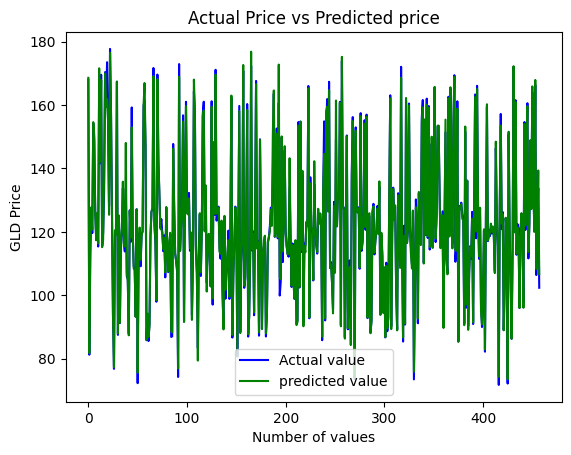

In [ ]:
plt.plot(Y_test, color='Blue', label='Actual value')
plt.plot(pred, color='Green', label='predicted value')

plt.title('Actual Price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

plt.legend()

plt.show()